# Questão 8

Apresente um estudo sobre algoritmos genéticos. Neste estudo apresente a solução (usando algoritmos genéticos) do problema de otimização que consiste na determinação do ponto máximo da função f ( x) = x seno( 10 pi x) + 1  Restrita ao intervalo -1,0 <= x < 2,0

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as stl
stl.use('default')

In [2]:
# Descrevendo a função passada para o python

def f(x):
  return x*np.sin(10*np.pi*x) + 1.0

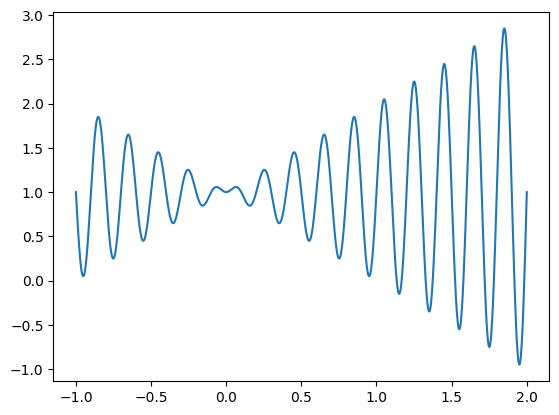

In [5]:
x = np.linspace(-1,2,1000)
y = f(x)

plt.plot(x,y)
plt.show()

In [6]:
# Inicialização dos parâmetros
genes = 2
chromosomes = 15
mattingPoolSize = 6
offspringSize = chromosomes - mattingPoolSize
lb = -1
ub = 2
populationSize = (chromosomes, genes)
generations = 3

In [7]:
#Inicialização da população
population = np.random.uniform(lb, ub, populationSize)

for generation in range(generations):
    print(("Generation:", generation+1))
    fitness = population*np.sin(10*np.pi*population) + 1
    print("\npopulation")
    print(population)
    print("\nfitness calcuation")
    print(fitness)
    parents = np.empty((mattingPoolSize, population.shape[1]))

    for p in range(mattingPoolSize):
        fittestIndex = np.where(fitness == np.max(fitness))
        fittestIndex = fittestIndex[0][0]
        parents[p, :] = population[fittestIndex, :]
        fitness[fittestIndex] = -1
    print("\nParents:")
    print(parents)

    offspring = np.empty((offspringSize, population.shape[1]))
    for k in range(offspringSize):
         crossoverPoint = np.random.randint(0,genes) 
         parent1Index = k%parents.shape[0]
         parent2Index = (k+1)%parents.shape[0]
         offspring[k, 0: crossoverPoint] = parents[parent1Index, 0: crossoverPoint]
         offspring[k, crossoverPoint:] = parents[parent2Index, crossoverPoint:]
    print("\nOffspring after crossover:")
    print(offspring)

    for index in range(offspring.shape[0]):
        randomIndex = np.random.randint(1,genes)
        randomValue = np.random.uniform(lb, ub, 1)
        offspring [index, randomIndex] = offspring [index, randomIndex] + randomValue
    print("\n Offspring after Mutation")
    print(offspring)

    population[0:parents.shape[0], :] = parents
    population[parents.shape[0]:, :] = offspring
    print("\nNew Population for next generation:")
    print(population)

('Generation:', 1)

population
[[ 1.86392802 -0.77495965]
 [ 1.73399944  0.96814247]
 [ 1.66985218  0.94470162]
 [ 1.50741471  0.71034923]
 [ 0.79918765  1.92140129]
 [-0.64806107 -0.27900382]
 [ 1.85762402  0.06657455]
 [ 0.53698401  1.66967262]
 [-0.37436225  0.69011271]
 [ 1.38247288  1.90322213]
 [ 1.49966677 -0.2365339 ]
 [ 1.48156962  0.80252872]
 [-0.2990103   1.29202216]
 [-0.66636028  1.51203746]
 [-0.89440713  0.34280162]]

fitness calcuation
[[ 2.68832289  0.45132653]
 [-0.51950054  0.18490033]
 [ 2.35548218  0.06835549]
 [ 0.65202984  0.77309126]
 [ 0.97960629 -0.19668633]
 [ 1.64685916  1.17097696]
 [ 2.80459439  1.05775134]
 [ 0.50728765  2.36081577]
 [ 0.73003575  1.21093118]
 [ 0.27665576  0.80767304]
 [ 1.01569946  1.21568133]
 [ 1.810705    1.06368743]
 [ 1.00929543  1.32044165]
 [ 1.58026519  0.44172777]
 [ 1.15634474  0.66592669]]

Parents:
[[ 1.85762402  0.06657455]
 [ 1.86392802 -0.77495965]
 [ 0.53698401  1.66967262]
 [ 1.66985218  0.94470162]
 [ 1.48156962  0.80

In [9]:
fitness = population*np.sin(10*np.pi*population) + 1
fittestIndex = np.where(fitness == np.max(fitness))
fittestIndex = fittestIndex[0][0]
fittestInd = population[fittestIndex, :]
bestFitness = fitness[fittestIndex]

print("\nBest Individual:")
print(fittestInd)
print("\nBest Individual's Fitness:")
print(bestFitness)


Best Individual:
[1.85762402 0.06657455]

Best Individual's Fitness:
[2.80459439 1.05775134]


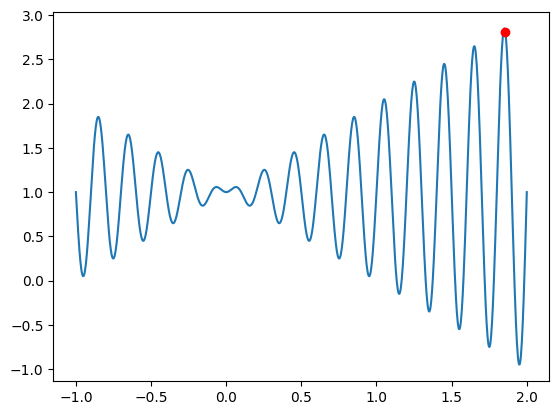

In [10]:
# plot the graph with the best individual
x = np.linspace(-1,2,1000)
y = f(x)
plt.plot(x,y)
plt.plot(fittestInd[0], f(fittestInd)[0], 'ro')
plt.show()